In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
import numpy as np
import pandas as pd

def generate_customer_profiles_table(n_customers, random_state=0):

    np.random.seed(random_state)

    customer_id_properties=[]

    # Generate customer properties from random distributions
    for customer_id in range(n_customers):

        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)

        mean_amount = np.random.uniform(5,100) # Arbitrary (but sensible) value
        std_amount = mean_amount/2 # Arbitrary (but sensible) value

        mean_nb_tx_per_day = np.random.uniform(0,4) # Arbitrary (but sensible) value

        customer_id_properties.append([customer_id,
                                      x_customer_id, y_customer_id,
                                      mean_amount, std_amount,
                                      mean_nb_tx_per_day])

    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                      'x_customer_id', 'y_customer_id',
                                                                      'mean_amount', 'std_amount',
                                                                      'mean_nb_tx_per_day'])

    return customer_profiles_table

n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,62.262521,31.131260,2.179533
1,1,42.365480,64.589411,46.570785,23.285393,3.567092
2,2,96.366276,38.344152,80.213879,40.106939,2.115580
3,3,56.804456,92.559664,11.748426,5.874213,0.348517
4,4,2.021840,83.261985,78.924891,39.462446,3.480049


In [ ]:
def generate_terminal_profiles_table(n_terminals, random_state=0):

    np.random.seed(random_state)

    terminal_id_properties=[]

    # Generate terminal properties from random distributions
    for terminal_id in range(n_terminals):

        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)

        terminal_id_properties.append([terminal_id,
                                      x_terminal_id, y_terminal_id])

    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['TERMINAL_ID',
                                                                      'x_terminal_id', 'y_terminal_id'])

    return terminal_profiles_table

n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [ ]:
def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):

    # Use numpy arrays in the following to speed up computations

    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)

    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)

    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))

    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])

    # Return the list of terminal IDs
    return available_terminals

# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
# And get the list of terminals within radius of $50$ for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)

[2, 3]

In [ ]:
%%capture
import matplotlib.pyplot as plt

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values,
           terminal_profiles_table.y_terminal_id.values,
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id,
           customer_profiles_table.iloc[customer_id].y_customer_id,
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])

ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

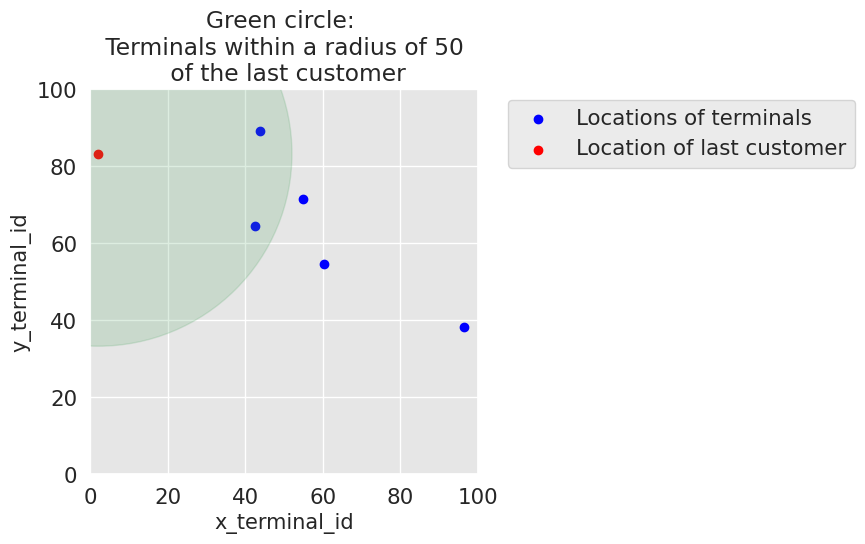

In [ ]:
terminals_available_to_customer_fig

In [ ]:
customer_profiles_table['available_terminals']=customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=50), axis=1)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3]"


In [ ]:
def generate_transactions_table(customer_profile, start_date = "2018-04-01", nb_days = 10):

    customer_transactions = []

    np.random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))

    # For all days
    for day in range(nb_days):

        # Random number of transactions for that day
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)

        # If nb_tx positive, let us generate transactions
        if nb_tx>0:

            for tx in range(nb_tx):

                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that
                # most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))

                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):

                    # Amount is drawn from a normal distribution
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)

                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)

                    amount=np.round(amount,decimals=2)

                    if len(customer_profile.available_terminals)>0:

                        terminal_id = np.random.choice(customer_profile.available_terminals)

                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID,
                                                      terminal_id, amount])

    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT'])

    if len(customer_transactions)>0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS']]

    return customer_transactions

transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)
transactions_df

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,2,123.59,26345,0
1,2018-04-01 11:41:39,0,1,58.92,42099,0
2,2018-04-01 12:48:00,0,0,107.54,46080,0
3,2018-04-01 18:15:06,0,0,51.09,65706,0
4,2018-04-04 06:39:44,0,3,74.00,283184,3
5,2018-04-04 09:44:39,0,3,70.56,294279,3
6,2018-04-04 16:48:08,0,3,39.16,319688,3
7,2018-04-04 09:31:55,0,0,51.52,293515,3
8,2018-04-04 20:07:34,0,0,110.05,331654,3
9,2018-04-04 16:31:02,0,2,55.13,318662,3


In [ ]:
import time

def generate_dataset(n_customers = 10000, n_terminals = 1000000, nb_days=90, start_date="2018-04-01", r=5):

    start_time=time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
    customer_profiles_table['available_terminals'] = customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    # With Pandarallel
    #customer_profiles_table['available_terminals'] = customer_profiles_table.parallel_apply(lambda x : get_list_closest_terminals(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    customer_profiles_table['nb_terminals']=customer_profiles_table.available_terminals.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    # With Pandarallel
    #transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))

    # Sort transactions chronologically
    transactions_df=transactions_df.sort_values('TX_DATETIME')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace=True,drop=True)
    transactions_df.reset_index(inplace=True)
    # TRANSACTION_ID are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)

(customer_profiles_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000,
                     n_terminals = 10000,
                     nb_days=183,
                     start_date="2018-04-01",
                     r=5)
transactions_df.shape
transactions_df

Time to generate customer profiles table: 0.072s
Time to generate terminal profiles table: 0.066s
Time to associate terminals to customers: 3.7s
Time to generate transactions: 2.3e+02s


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,0,2018-04-01 00:02:52,4891,6045,61.04,172,0
1,1,2018-04-01 00:02:55,1336,8784,35.07,175,0
2,2,2018-04-01 00:04:53,4816,542,29.54,293,0
3,3,2018-04-01 00:05:45,1963,2613,8.52,345,0
4,4,2018-04-01 00:07:25,2829,9021,18.14,445,0
...,...,...,...,...,...,...,...
1757167,1757167,2018-09-30 23:58:09,1533,9044,57.40,15811089,182
1757168,1757168,2018-09-30 23:58:27,2111,2672,10.43,15811107,182
1757169,1757169,2018-09-30 23:58:36,2046,9825,19.85,15811116,182
1757170,1757170,2018-09-30 23:59:21,3219,7236,81.35,15811161,182


In [ ]:
%%capture
import seaborn as sns

distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=10000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=10000).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")



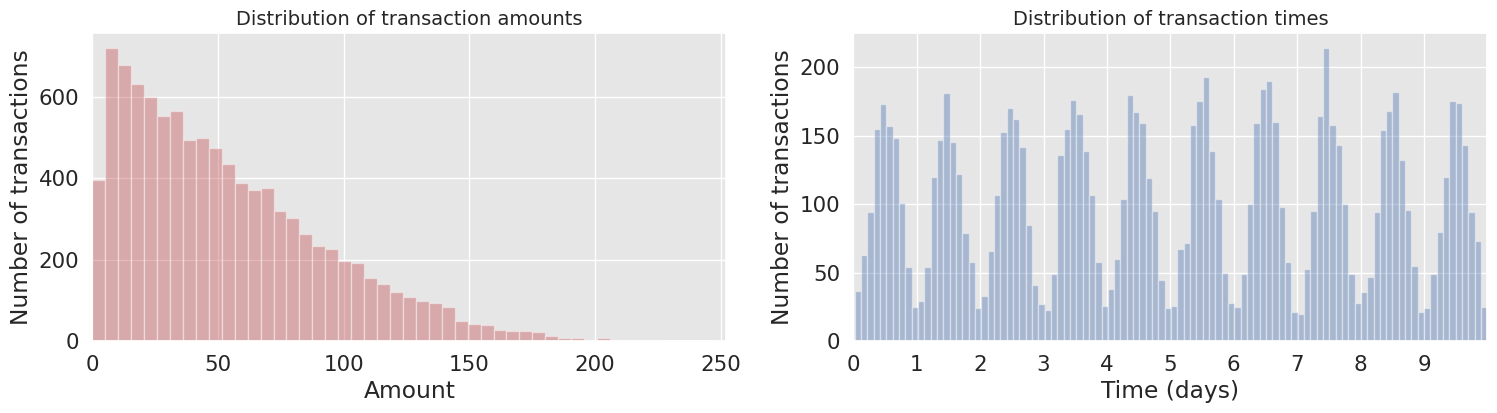

In [ ]:
distribution_amount_times_fig

In [ ]:
import random
def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):

    # By default, all transactions are genuine
    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0

    # Scenario 1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD']=1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD_SCENARIO']=1
    nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    print("Number of frauds from scenario 1: "+str(nb_frauds_scenario_1))

    # Scenario 2
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_terminals = terminal_profiles_table.TERMINAL_ID.sample(n=2, random_state=day)

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+28) &
                                                    (transactions_df.TERMINAL_ID.isin(compromised_terminals))]

        transactions_df.loc[compromised_transactions.index,'TX_FRAUD']=1
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO']=2

    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))

    # Scenario 3
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_customers = customer_profiles_table.CUSTOMER_ID.sample(n=3, random_state=day).values

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+14) &
                                                    (transactions_df.CUSTOMER_ID.isin(compromised_customers))]

        nb_compromised_transactions=len(compromised_transactions)


        np.random.seed(day)
        index_fauds = random.sample(list(compromised_transactions.index.values), k=int(nb_compromised_transactions/3))

        transactions_df.loc[index_fauds,'TX_AMOUNT']=transactions_df.loc[index_fauds,'TX_AMOUNT']*5
        transactions_df.loc[index_fauds,'TX_FRAUD']=1
        transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=3


    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))

    return transactions_df

%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

Number of frauds from scenario 1: 968
Number of frauds from scenario 2: 9091
Number of frauds from scenario 3: 4600
CPU times: user 2min 24s, sys: 517 ms, total: 2min 24s
Wall time: 2min 25s


In [ ]:
transactions_df.TX_FRAUD.mean()
transactions_df.TX_FRAUD.sum()
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:02:52,4891,6045,61.04,172,0,0,0
1,1,2018-04-01 00:02:55,1336,8784,35.07,175,0,0,0
2,2,2018-04-01 00:04:53,4816,542,29.54,293,0,0,0
3,3,2018-04-01 00:05:45,1963,2613,8.52,345,0,0,0
4,4,2018-04-01 00:07:25,2829,9021,18.14,445,0,0,0


In [ ]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

(4620, 9)

In [ ]:
def get_stats(transactions_df):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()

In [ ]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,300])

labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)

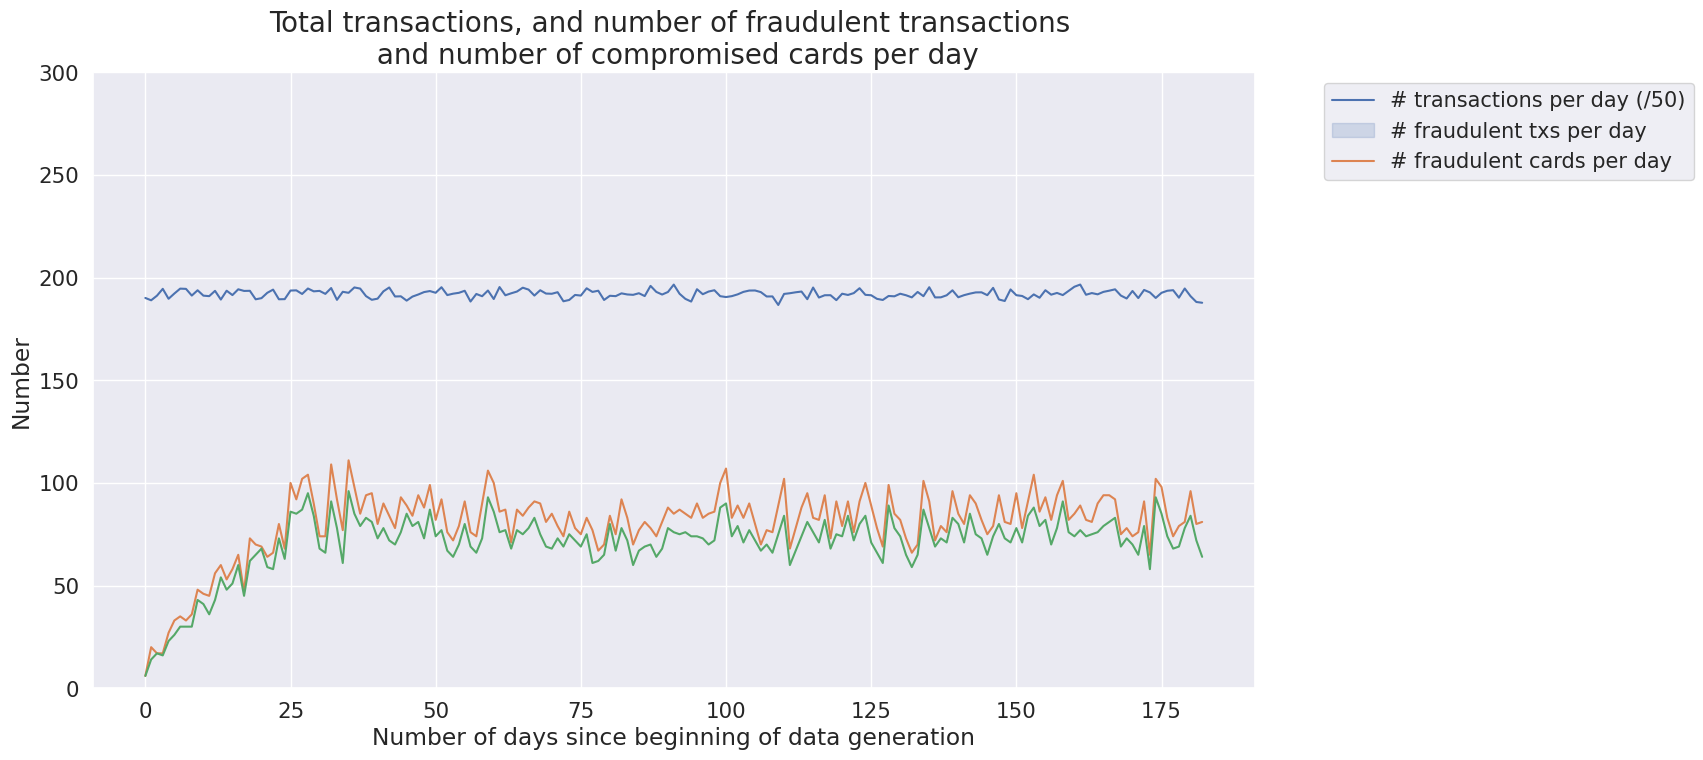

In [ ]:
fraud_and_transactions_stats_fig

In [ ]:
import os
import datetime

DIR_OUTPUT = "./simulated-data-raw/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):

    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')

    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'

    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

In [ ]:
from google.colab import files

files.download(DIR_OUTPUT+filename_output)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Initialization: Load shared functions and simulated data

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-raw"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-raw


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   257k      0 --:--:-- --:--:-- --:--:--  258k


<Figure size 640x480 with 0 Axes>

In [ ]:
DIR_INPUT='/content/simulated-data-raw'

BEGIN_DATE = "2018-04-01"
END_DATE = "2018-09-30"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
CPU times: user 3.05 s, sys: 432 ms, total: 3.48 s
Wall time: 3.5 s
1757172 transactions loaded, containing 14659 fraudulent transactions


In [ ]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:02:52,4891,6045,61.04,172,0,0,0
1,1,2018-04-01 00:02:55,1336,8784,35.07,175,0,0,0
2,2,2018-04-01 00:04:53,4816,542,29.54,293,0,0,0
3,3,2018-04-01 00:05:45,1963,2613,8.52,345,0,0,0
4,4,2018-04-01 00:07:25,2829,9021,18.14,445,0,0,0


In [ ]:
def is_weekend(tx_datetime):

    # Transform date into weekday (0 is Monday, 6 is Sunday)
    weekday = tx_datetime.weekday()
    # Binary value: 0 if weekday, 1 if weekend
    is_weekend = weekday>=5

    return int(is_weekend)

%time transactions_df['TX_DURING_WEEKEND']=transactions_df.TX_DATETIME.apply(is_weekend)

CPU times: user 5.39 s, sys: 232 ms, total: 5.63 s
Wall time: 5.72 s


In [ ]:
def is_night(tx_datetime):

    # Get the hour of the transaction
    tx_hour = tx_datetime.hour
    # Binary value: 1 if hour less than 6, and 0 otherwise
    is_night = tx_hour<=6

    return int(is_night)

%time transactions_df['TX_DURING_NIGHT']=transactions_df.TX_DATETIME.apply(is_night)

CPU times: user 3.83 s, sys: 114 ms, total: 3.95 s
Wall time: 3.92 s


In [ ]:
def get_customer_spending_behaviour_features(customer_transactions, windows_size_in_days=[1,7,30]):

    # Let us first order transactions chronologically
    customer_transactions=customer_transactions.sort_values('TX_DATETIME')

    # The transaction date and time is set as the index, which will allow the use of the rolling function
    customer_transactions.index=customer_transactions.TX_DATETIME

    # For each window size
    for window_size in windows_size_in_days:

        # Compute the sum of the transaction amounts and the number of transactions for the given window size
        SUM_AMOUNT_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').sum()
        NB_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').count()

        # Compute the average transaction amount for the given window size
        # NB_TX_WINDOW is always >0 since current transaction is always included
        AVG_AMOUNT_TX_WINDOW=SUM_AMOUNT_TX_WINDOW/NB_TX_WINDOW

        # Save feature values
        customer_transactions['CUSTOMER_ID_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT_'+str(window_size)+'DAY_WINDOW']=list(AVG_AMOUNT_TX_WINDOW)

    # Reindex according to transaction IDs
    customer_transactions.index=customer_transactions.TRANSACTION_ID

    # And return the dataframe with the new features
    return customer_transactions

spending_behaviour_customer_0=get_customer_spending_behaviour_features(transactions_df[transactions_df.CUSTOMER_ID==0])
spending_behaviour_customer_0spending_behaviour_customer_0=get_customer_spending_behaviour_features(transactions_df[transactions_df.CUSTOMER_ID==0])
spending_behaviour_customer_0

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,
1738,1738,2018-04-01 07:19:05,0,9373,123.59,26345,0,0,0,1,0,1.0,123.590000,1.0,123.590000,1.0,123.590000
2892,2892,2018-04-01 09:23:04,0,1702,92.55,33784,0,0,0,1,0,2.0,108.070000,2.0,108.070000,2.0,108.070000
4432,4432,2018-04-01 11:41:39,0,7707,58.92,42099,0,0,0,1,0,3.0,91.686667,3.0,91.686667,3.0,91.686667
5208,5208,2018-04-01 12:48:00,0,3383,107.54,46080,0,0,0,1,0,4.0,95.650000,4.0,95.650000,4.0,95.650000
20432,20432,2018-04-03 06:39:44,0,3028,74.00,196784,2,0,0,0,1,1.0,74.000000,5.0,91.320000,5.0,91.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744050,1744050,2018-09-29 13:22:14,0,7228,38.34,15686534,181,0,0,1,0,2.0,49.415000,20.0,63.491000,66.0,61.956061
1746720,1746720,2018-09-29 18:24:25,0,3544,1.88,15704665,181,0,0,1,0,2.0,20.110000,19.0,60.418947,67.0,61.059403
1751854,1751854,2018-09-30 11:14:21,0,144,41.62,15765261,182,0,0,1,0,3.0,27.280000,19.0,58.342105,67.0,61.425373


In [ ]:
%time transactions_df=transactions_df.groupby('CUSTOMER_ID').apply(lambda x: get_customer_spending_behaviour_features(x, windows_size_in_days=[1,7,30]))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)
transactions_df

CPU times: user 31.3 s, sys: 197 ms, total: 31.5 s
Wall time: 31.7 s


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
0,0,2018-04-01 00:02:52,4891,6045,61.04,172,0,0,0,1,1,1.0,61.040000,1.0,61.040000,1.0,61.040000
1,1,2018-04-01 00:02:55,1336,8784,35.07,175,0,0,0,1,1,1.0,35.070000,1.0,35.070000,1.0,35.070000
2,2,2018-04-01 00:04:53,4816,542,29.54,293,0,0,0,1,1,1.0,29.540000,1.0,29.540000,1.0,29.540000
3,3,2018-04-01 00:05:45,1963,2613,8.52,345,0,0,0,1,1,1.0,8.520000,1.0,8.520000,1.0,8.520000
4,4,2018-04-01 00:07:25,2829,9021,18.14,445,0,0,0,1,1,1.0,18.140000,1.0,18.140000,1.0,18.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757167,1757167,2018-09-30 23:58:09,1533,9044,57.40,15811089,182,0,0,1,0,4.0,39.832500,22.0,41.877273,69.0,53.246522
1757168,1757168,2018-09-30 23:58:27,2111,2672,10.43,15811107,182,0,0,1,0,4.0,11.485000,24.0,16.167500,96.0,15.296875
1757169,1757169,2018-09-30 23:58:36,2046,9825,19.85,15811116,182,0,0,1,0,1.0,19.850000,8.0,47.767500,47.0,48.980213
1757170,1757170,2018-09-30 23:59:21,3219,7236,81.35,15811161,182,0,0,1,0,3.0,63.276667,19.0,83.250526,64.0,97.513281


In [ ]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"):

    terminal_transactions=terminal_transactions.sort_values('TX_DATETIME')

    terminal_transactions.index=terminal_transactions.TX_DATETIME

    NB_FRAUD_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').sum()
    NB_TX_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').count()

    for window_size in windows_size_in_days:

        NB_FRAUD_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').sum()
        NB_TX_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').count()

        NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
        NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY

        RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW

        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(RISK_WINDOW)

    terminal_transactions.index=terminal_transactions.TRANSACTION_ID

    # Replace NA values with 0 (all undefined risk scores where NB_TX_WINDOW is 0)
    terminal_transactions.fillna(0,inplace=True)

    return terminal_transactions

transactions_df[transactions_df.TX_FRAUD==1]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
120,120,2018-04-01 01:23:21,1319,7499,248.41,5001,0,1,1,1,1,1.0,248.41,1.0,248.410000,1.0,248.410000
192,192,2018-04-01 01:56:23,398,3362,44.00,6983,0,1,3,1,1,1.0,44.00,1.0,44.000000,1.0,44.000000
1792,1792,2018-04-01 07:25:23,2997,9394,75.61,26723,0,1,2,1,0,1.0,75.61,1.0,75.610000,1.0,75.610000
2596,2596,2018-04-01 08:54:38,3149,9394,25.01,32078,0,1,2,1,0,1.0,25.01,1.0,25.010000,1.0,25.010000
4628,4627,2018-04-01 12:00:15,1921,898,16.67,43215,0,1,2,1,0,2.0,20.15,2.0,20.150000,2.0,20.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756709,1756709,2018-09-30 20:33:08,2331,9448,30.09,15798788,182,1,2,1,0,4.0,47.29,23.0,42.586522,85.0,47.064471
1756866,1756866,2018-09-30 21:22:09,806,8935,3.58,15801729,182,1,2,1,0,2.0,7.71,6.0,18.725000,30.0,23.174667
1756868,1756868,2018-09-30 21:22:19,2159,3046,168.60,15801739,182,1,2,1,0,5.0,117.50,15.0,106.720667,48.0,100.251042
1757072,1757072,2018-09-30 22:51:40,4362,8305,22.65,15807100,182,1,3,1,0,2.0,15.85,21.0,17.399524,88.0,14.047500


In [ ]:
# Get the first terminal ID that contains frauds
transactions_df[transactions_df.TX_FRAUD==0].TERMINAL_ID[0]

get_count_risk_rolling_window(transactions_df[transactions_df.TERMINAL_ID==3059], delay_period=7, windows_size_in_days=[1,7,30])

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,,,,,
28263,28263,2018-04-03 21:40:06,1769,3059,84.25,250806,2,0,0,0,...,6.0,79.223333,6.0,79.223333,0.0,0.0,0.0,0.0,0.0,0.0
34190,34190,2018-04-04 13:02:03,55,3059,48.08,306123,3,0,0,0,...,9.0,36.122222,9.0,36.122222,0.0,0.0,0.0,0.0,0.0,0.0
49162,49162,2018-04-06 06:20:03,1197,3059,80.22,454803,5,0,0,0,...,14.0,68.010000,14.0,68.010000,0.0,0.0,0.0,0.0,0.0,0.0
50263,50263,2018-04-06 08:34:33,1483,3059,3.51,462873,5,0,0,0,...,14.0,8.430000,14.0,8.430000,0.0,0.0,0.0,0.0,0.0,0.0
53164,53164,2018-04-06 12:55:30,118,3059,152.98,478530,5,0,0,0,...,18.0,96.801111,18.0,96.801111,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691155,1691155,2018-09-24 05:14:56,2045,3059,64.62,15225296,176,0,0,0,...,13.0,72.126154,59.0,71.359153,0.0,0.0,6.0,0.0,31.0,0.0
1705886,1705886,2018-09-25 13:30:15,1483,3059,7.27,15341415,177,0,0,0,...,22.0,7.382273,74.0,7.930000,0.0,0.0,5.0,0.0,28.0,0.0
1705969,1705969,2018-09-25 13:36:54,1519,3059,29.64,15341814,177,0,0,0,...,8.0,46.781250,30.0,50.862333,0.0,0.0,5.0,0.0,28.0,0.0


In [ ]:
%time transactions_df=transactions_df.groupby('TERMINAL_ID').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)
transactions_df

CPU times: user 1min 18s, sys: 711 ms, total: 1min 19s
Wall time: 1min 20s


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:02:52,4891,6045,61.04,172,0,0,0,1,...,1.0,61.040000,1.0,61.040000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:55,1336,8784,35.07,175,0,0,0,1,...,1.0,35.070000,1.0,35.070000,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:04:53,4816,542,29.54,293,0,0,0,1,...,1.0,29.540000,1.0,29.540000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:05:45,1963,2613,8.52,345,0,0,0,1,...,1.0,8.520000,1.0,8.520000,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:07:25,2829,9021,18.14,445,0,0,0,1,...,1.0,18.140000,1.0,18.140000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757167,1757167,2018-09-30 23:58:09,1533,9044,57.40,15811089,182,0,0,1,...,22.0,41.877273,69.0,53.246522,1.0,0.0,5.0,0.0,36.0,0.0
1757168,1757168,2018-09-30 23:58:27,2111,2672,10.43,15811107,182,0,0,1,...,24.0,16.167500,96.0,15.296875,1.0,0.0,9.0,0.0,26.0,0.0
1757169,1757169,2018-09-30 23:58:36,2046,9825,19.85,15811116,182,0,0,1,...,8.0,47.767500,47.0,48.980213,0.0,0.0,3.0,0.0,24.0,0.0
1757170,1757170,2018-09-30 23:59:21,3219,7236,81.35,15811161,182,0,0,1,...,19.0,83.250526,64.0,97.513281,2.0,0.0,8.0,0.0,24.0,0.0


In [ ]:
DIR_OUTPUT = "./simulated-data-transformed/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):

    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')

    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'

    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

In [ ]:
# Initialization: Load shared functions and simulated data

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   468k      0 --:--:-- --:--:-- --:--:--  471k


In [ ]:
# Load data from the 2018-07-25 to the 2018-08-14

DIR_INPUT='/content/simulated-data-transformed'

BEGIN_DATE = "2018-07-25"
END_DATE = "2018-08-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
CPU times: user 90.7 ms, sys: 5.98 ms, total: 96.7 ms
Wall time: 96.2 ms
201251 transactions loaded, containing 1763 fraudulent transactions


In [ ]:
# Compute the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

def get_tx_stats(transactions_df, start_date_df="2018-04-01"):

    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraudulent_transactions_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of compromised cards per day
    nb_compromised_cards_per_day=transactions_df[transactions_df['TX_FRAUD']==1].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    tx_stats=pd.DataFrame({"nb_tx_per_day":nb_tx_per_day,
                           "nb_fraudulent_transactions_per_day":nb_fraudulent_transactions_per_day,
                           "nb_compromised_cards_per_day":nb_compromised_cards_per_day})

    tx_stats=tx_stats.reset_index()

    start_date = datetime.datetime.strptime(start_date_df, "%Y-%m-%d")
    tx_date=start_date+tx_stats['TX_TIME_DAYS'].apply(datetime.timedelta)

    tx_stats['tx_date']=tx_date

    return tx_stats

tx_stats=get_tx_stats(transactions_df, start_date_df="2018-04-01")

In [ ]:
%%capture

# Plot the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

def get_template_tx_stats(ax ,fs,
                          start_date_training,
                          title='',
                          delta_train=7,
                          delta_delay=7,
                          delta_test=7,
                          ylim=300):

    ax.set_title(title, fontsize=fs*1.5)
    ax.set_ylim([0, ylim])

    ax.set_xlabel('Date', fontsize=fs)
    ax.set_ylabel('Number', fontsize=fs)

    plt.yticks(fontsize=fs*0.7)
    plt.xticks(fontsize=fs*0.7)

    ax.axvline(start_date_training+datetime.timedelta(days=delta_train), 0,ylim, color="black")
    ax.axvline(start_date_test, 0, ylim, color="black")

    ax.text(start_date_training+datetime.timedelta(days=2), ylim-20,'Training period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+2), ylim-20,'Delay period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+delta_delay+2), ylim-20,'Test period', fontsize=fs)


cmap = plt.get_cmap('jet')
colors={'nb_tx_per_day':cmap(0),
        'nb_fraudulent_transactions_per_day':cmap(200),
        'nb_compromised_cards_per_day':cmap(250)}

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7

end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)

get_template_tx_stats(ax, fs=20,
                      start_date_training=start_date_training,
                      title='Total transactions, and number of fraudulent transactions \n and number of compromised cards per day',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test
                     )

ax.plot(tx_stats['tx_date'], tx_stats['nb_tx_per_day']/50, 'b', color=colors['nb_tx_per_day'], label = '# transactions per day (/50)')
ax.plot(tx_stats['tx_date'], tx_stats['nb_fraudulent_transactions_per_day'], 'b', color=colors['nb_fraudulent_transactions_per_day'], label = '# fraudulent txs per day')
ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day'], 'b', color=colors['nb_compromised_cards_per_day'], label = '# compromised cards per day')

ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)



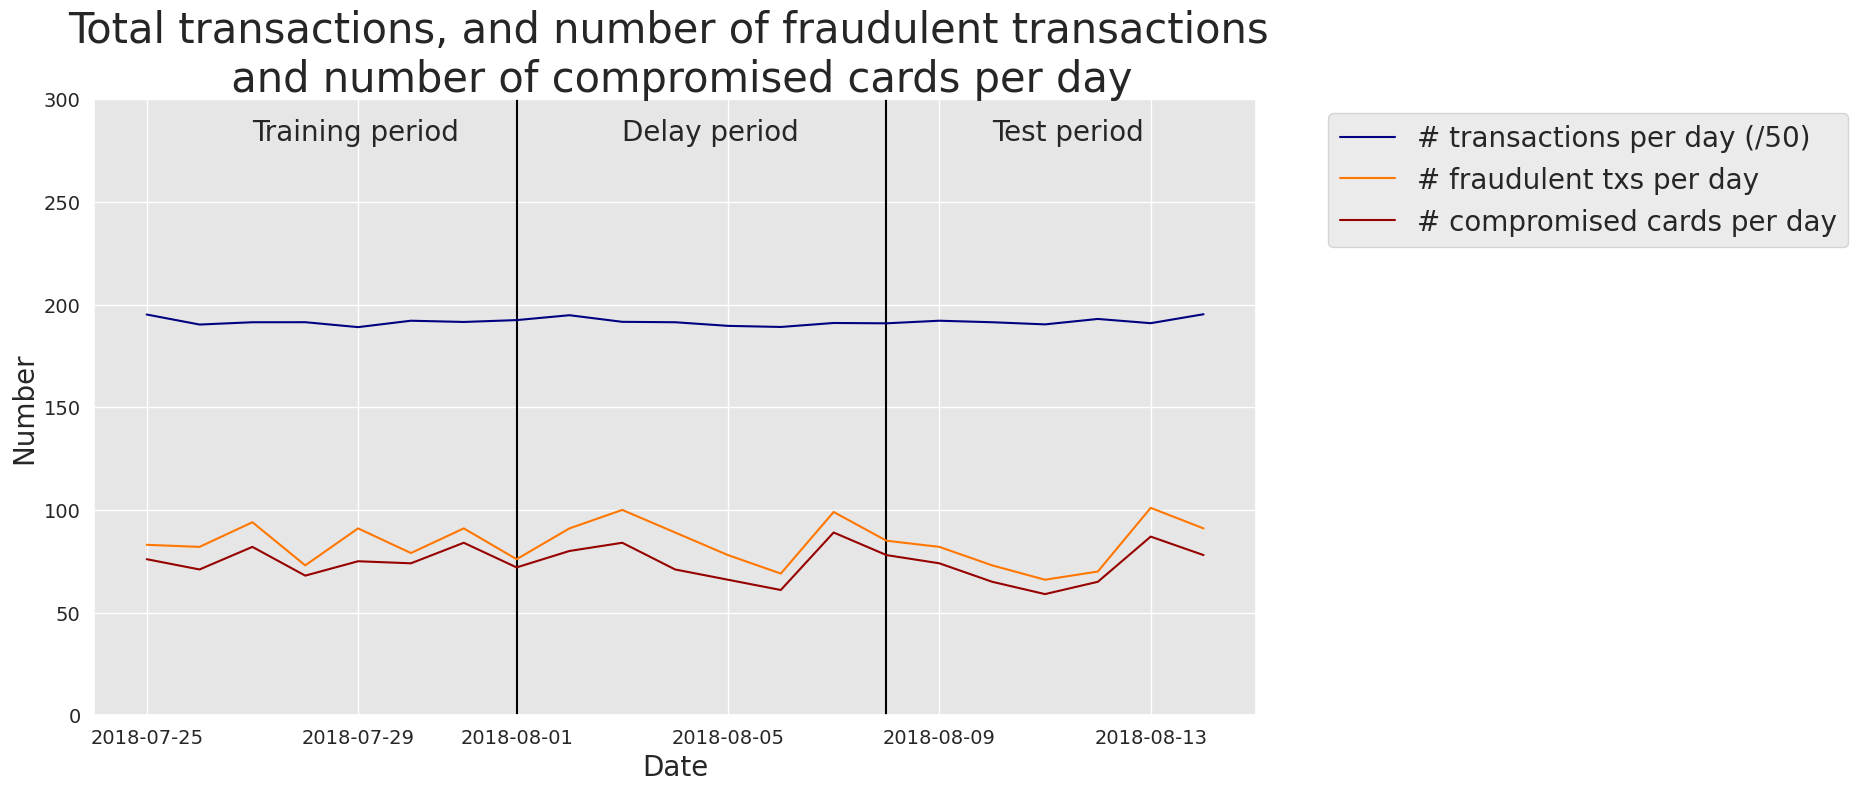

In [ ]:
fraud_and_transactions_stats_fig

In [ ]:
def get_train_test_set(transactions_df,
                       start_date_training,
                       delta_train=7,delta_delay=7,delta_test=7):

    # Get the training set data
    train_df = transactions_df[(transactions_df.TX_DATETIME>=start_date_training) &
                               (transactions_df.TX_DATETIME<start_date_training+datetime.timedelta(days=delta_train))]

    # Get the test set data
    test_df = []

    # Note: Cards known to be compromised after the delay period are removed from the test set
    # That is, for each test day, all frauds known at (test_day-delay_period) are removed

    # First, get known defrauded customers from the training set
    known_defrauded_customers = set(train_df[train_df.TX_FRAUD==1].CUSTOMER_ID)

    # Get the relative starting day of training set (easier than TX_DATETIME to collect test data)
    start_tx_time_days_training = train_df.TX_TIME_DAYS.min()

    # Then, for each day of the test set
    for day in range(delta_test):

        # Get test data for that day
        test_df_day = transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+
                                                                    delta_train+delta_delay+
                                                                    day]

        # Compromised cards from that test day, minus the delay period, are added to the pool of known defrauded customers
        test_df_day_delay_period = transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+
                                                                                delta_train+
                                                                                day-1]

        new_defrauded_customers = set(test_df_day_delay_period[test_df_day_delay_period.TX_FRAUD==1].CUSTOMER_ID)
        known_defrauded_customers = known_defrauded_customers.union(new_defrauded_customers)

        test_df_day = test_df_day[~test_df_day.CUSTOMER_ID.isin(known_defrauded_customers)]

        test_df.append(test_df_day)

    test_df = pd.concat(test_df)

    # Sort data sets by ascending order of transaction ID
    train_df=train_df.sort_values('TRANSACTION_ID')
    test_df=test_df.sort_values('TRANSACTION_ID')

    return (train_df, test_df)

In [ ]:
(train_df, test_df)=get_train_test_set(transactions_df,start_date_training,
                                       delta_train=7,delta_delay=7,delta_test=7)
train_df.shape

(67048, 23)

In [ ]:
train_df[train_df.TX_FRAUD==1].shape

(593, 23)

In [ ]:
test_df.shape

(58044, 23)

In [ ]:
test_df[test_df.TX_FRAUD==1].shape

(383, 23)

In [ ]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

In [ ]:
def fit_model_and_get_predictions(classifier, train_df, test_df,
                                  input_features, output_feature="TX_FRAUD",scale=True):

    # By default, scales input data
    if scale:
        (train_df, test_df)=scaleData(train_df,test_df,input_features)

    # We first train the classifier using the `fit` method, and pass as arguments the input and output features
    start_time=time.time()
    classifier.fit(train_df[input_features], train_df[output_feature])
    training_execution_time=time.time()-start_time

    # We then get the predictions on the training and test data using the `predict_proba` method
    # The predictions are returned as a numpy array, that provides the probability of fraud for each transaction
    start_time=time.time()
    predictions_test=classifier.predict_proba(test_df[input_features])[:,1]
    prediction_execution_time=time.time()-start_time

    predictions_train=classifier.predict_proba(train_df[input_features])[:,1]

    # The result is returned as a dictionary containing the fitted models,
    # and the predictions on the training and test sets
    model_and_predictions_dictionary = {'classifier': classifier,
                                        'predictions_test': predictions_test,
                                        'predictions_train': predictions_train,
                                        'training_execution_time': training_execution_time,
                                        'prediction_execution_time': prediction_execution_time
                                       }

    return model_and_predictions_dictionary

In [ ]:
# We first create a decision tree object. We will limit its depth to 2 for interpretability,
# and set the random state to zero for reproducibility
classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df,
                                                                 input_features, output_feature,
                                                                 scale=False)

In [ ]:
test_df['TX_FRAUD_PREDICTED']=model_and_predictions_dictionary['predictions_test']
test_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD_PREDICTED
134050,1238809,2018-08-08 00:00:35,2727,8006,88.95,11145635,129,0,0,0,...,48.370435,95.0,55.932947,1.0,0.0,5.0,0.0,21.0,0.0,0.003577
134051,1238810,2018-08-08 00:00:35,683,8870,105.19,11145635,129,0,0,0,...,105.280833,59.0,89.688814,1.0,0.0,5.0,0.0,39.0,0.0,0.003577
134052,1238811,2018-08-08 00:01:03,1229,3025,5.51,11145663,129,0,0,0,...,13.037647,84.0,13.529524,0.0,0.0,7.0,0.0,20.0,0.0,0.003577
134053,1238812,2018-08-08 00:01:05,3665,5274,21.30,11145665,129,0,0,0,...,16.612353,41.0,15.413415,0.0,0.0,6.0,0.0,26.0,0.0,0.003577
134054,1238813,2018-08-08 00:02:27,154,4207,71.72,11145747,129,0,0,0,...,38.824615,106.0,42.498302,0.0,0.0,7.0,0.0,24.0,0.0,0.003577


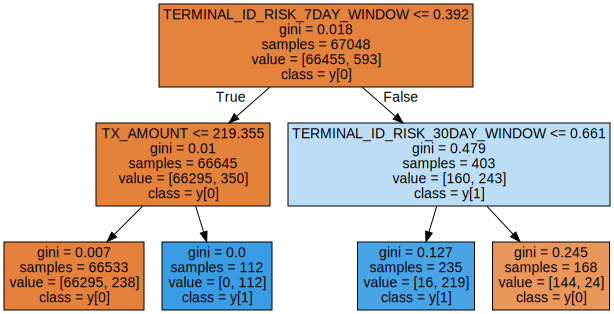

In [ ]:
display(graphviz.Source(sklearn.tree.export_graphviz(classifier,feature_names=input_features,class_names=True, filled=True)))

In [ ]:
def card_precision_top_k_day(df_day, top_k):
    # This takes the max of the predictions AND the max of label TX_FRAUD for each CUSTOMER_ID,
    # and sorts by decreasing order of fraudulent prediction
    df_day = df_day.groupby('CUSTOMER_ID').max().sort_values(by="predictions", ascending=False).reset_index(drop=False)

    # Get the top k most suspicious cards
    df_day_top_k = df_day.head(top_k)
    list_detected_compromised_cards = list(df_day_top_k[df_day_top_k.TX_FRAUD == 1].CUSTOMER_ID)

    # Compute precision top k
    card_precision_top_k = len(list_detected_compromised_cards) / top_k

    return list_detected_compromised_cards, card_precision_top_k

def card_precision_top_k(predictions_df, top_k, remove_detected_compromised_cards=True):
    # Sort days by increasing order
    list_days = list(predictions_df['TX_TIME_DAYS'].unique())
    list_days.sort()

    # At first, the list of detected compromised cards is empty
    list_detected_compromised_cards = []

    card_precision_top_k_per_day_list = []
    nb_compromised_cards_per_day = []

    # For each day, compute precision top k
    for day in list_days:
        df_day = predictions_df[predictions_df['TX_TIME_DAYS'] == day]
        df_day = df_day[['predictions', 'CUSTOMER_ID', 'TX_FRAUD']]

        # Let us remove detected compromised cards from the set of daily transactions
        df_day = df_day[df_day.CUSTOMER_ID.isin(list_detected_compromised_cards) == False]

        nb_compromised_cards_per_day.append(len(df_day[df_day.TX_FRAUD == 1].CUSTOMER_ID.unique()))

        detected_compromised_cards, card_precision_top_k = card_precision_top_k_day(df_day, top_k)

        card_precision_top_k_per_day_list.append(card_precision_top_k)

        # Let us update the list of detected compromised cards
        if remove_detected_compromised_cards:
            list_detected_compromised_cards.extend(detected_compromised_cards)

    # Compute the mean
    mean_card_precision_top_k = np.array(card_precision_top_k_per_day_list).mean()

    # Returns precision top k per day as a list, and resulting mean
    return nb_compromised_cards_per_day, card_precision_top_k_per_day_list, mean_card_precision_top_k

def performance_assessment(predictions_df, output_feature='TX_FRAUD',
                           prediction_feature='predictions', top_k_list=[100],
                           rounded=True):

    AUC_ROC = metrics.roc_auc_score(predictions_df[output_feature], predictions_df[prediction_feature])
    AP = metrics.average_precision_score(predictions_df[output_feature], predictions_df[prediction_feature])

    performances = pd.DataFrame([[AUC_ROC, AP]],
                                columns=['AUC ROC', 'Average precision'])

    for top_k in top_k_list:
        _, _, mean_card_precision_top_k = card_precision_top_k(predictions_df, top_k)
        performances['Card Precision@' + str(top_k)] = mean_card_precision_top_k

    if rounded:
        performances = performances.round(3)

    return performances


In [ ]:
predictions_df=test_df
predictions_df['predictions']=model_and_predictions_dictionary['predictions_test']

performance_assessment(predictions_df, top_k_list=[100])

,AUC ROC,Average precision,Card Precision@100
0,0.77,0.505,0.241


In [ ]:
predictions_df['predictions']=0.5

performance_assessment(predictions_df, top_k_list=[100])

,AUC ROC,Average precision,Card Precision@100
0,0.5,0.007,0.02


In [ ]:
import pandas as pd
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import xgboost

# Define classifiers
classifiers_dictionary = {
    'Logistic regression': sklearn.linear_model.LogisticRegression(random_state=0),
    'Decision tree with depth of two': sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=0),
    'Decision tree - unlimited depth': sklearn.tree.DecisionTreeClassifier(random_state=0),
    'Random forest': sklearn.ensemble.RandomForestClassifier(random_state=0, n_jobs=-1),
    'XGBoost': xgboost.XGBClassifier(random_state=0, n_jobs=-1),
}

# Initialize dictionary to store fitted models and predictions
fitted_models_and_predictions_dictionary = {}

# Fit models and store predictions
for classifier_name in classifiers_dictionary:
    model_and_predictions = fit_model_and_get_predictions(
        classifiers_dictionary[classifier_name], train_df, test_df,
        input_features=input_features, output_feature=output_feature
    )
    fitted_models_and_predictions_dictionary[classifier_name] = model_and_predictions

# Define the function for performance assessment
def performance_assessment_model_collection(fitted_models_and_predictions_dictionary, transactions_df, type_set='test', top_k_list=[100]):
    performances = pd.DataFrame()

    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
        predictions_df = transactions_df.copy()
        predictions_df['predictions'] = model_and_predictions['predictions_' + type_set]

        performances_model = performance_assessment(
            predictions_df, output_feature='TX_FRAUD',
            prediction_feature='predictions', top_k_list=top_k_list
        )
        performances_model.index = [classifier_name]

        # Use pd.concat instead of append
        performances = pd.concat([performances, performances_model])

    return performances

# Performances on test set
# performances on test set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, test_df,
                                                        type_set='test',
                                                        top_k_list=[100])
df_performances

,AUC ROC,Average precision,Card Precision@100
Logistic regression,0.860,0.576,0.267
Decision tree with depth of two,0.770,0.505,0.241
Decision tree - unlimited depth,0.792,0.286,0.246
Random forest,0.851,0.626,0.276
XGBoost,0.853,0.594,0.261


In [ ]:
# performances on training set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, train_df,
                                                        type_set='train',
                                                        top_k_list=[100])
df_performances

,AUC ROC,Average precision,Card Precision@100
Logistic regression,0.895,0.658,0.421
Decision tree with depth of two,0.799,0.573,0.404
Decision tree - unlimited depth,1.000,1.000,0.581
Random forest,1.000,1.000,0.581
XGBoost,1.000,0.995,0.579


In [ ]:
import pandas as pd

def execution_times_model_collection(fitted_models_and_predictions_dictionary):
    execution_times = pd.DataFrame()

    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
        execution_times_model = pd.DataFrame({
            'Training execution time': [model_and_predictions['training_execution_time']],
            'Prediction execution time': [model_and_predictions['prediction_execution_time']]
        }, index=[classifier_name])

        # Use pd.concat instead of append
        execution_times = pd.concat([execution_times, execution_times_model])

    return execution_times

# Execution times
df_execution_times = execution_times_model_collection(fitted_models_and_predictions_dictionary)

# Display the execution times
print(df_execution_times)


                                 Training execution time  \
Logistic regression                             0.539627   
Decision tree with depth of two                 0.221486   
Decision tree - unlimited depth                 1.556570   
Random forest                                  15.600041   
XGBoost                                         0.672931   

                                 Prediction execution time  
Logistic regression                               0.042961  
Decision tree with depth of two                   0.016701  
Decision tree - unlimited depth                   0.016903  
Random forest                                     0.672845  
XGBoost                                           0.131187  


In [ ]:
import pandas as pd

def execution_times_model_collection(fitted_models_and_predictions_dictionary):
    execution_times = pd.DataFrame()

    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
        execution_times_model = pd.DataFrame({
            'Training execution time': [model_and_predictions['training_execution_time']],
            'Prediction execution time': [model_and_predictions['prediction_execution_time']]
        }, index=[classifier_name])

        # Use pd.concat instead of append
        execution_times = pd.concat([execution_times, execution_times_model])

    return execution_times

# Execution times
df_execution_times = execution_times_model_collection(fitted_models_and_predictions_dictionary)

# Display the execution times
print(df_execution_times)


                                 Training execution time  \
Logistic regression                             0.539627   
Decision tree with depth of two                 0.221486   
Decision tree - unlimited depth                 1.556570   
Random forest                                  15.600041   
XGBoost                                         0.672931   

                                 Prediction execution time  
Logistic regression                               0.042961  
Decision tree with depth of two                   0.016701  
Decision tree - unlimited depth                   0.016903  
Random forest                                     0.672845  
XGBoost                                           0.131187  


In [ ]:
!git clone https://github.com/phongsathorn1/pretty-confusion-matrix.git
# numpy==1.17.3
# pandas==1.2.0
# seaborn==0.10.0
# matplotlib==3.2.1
# sklearn


fatal: destination path 'pretty-confusion-matrix' already exists and is not an empty directory.


In [ ]:
def get_class_from_fraud_probability(fraud_probabilities, threshold=0.5):

    predicted_classes = [0 if fraud_probability<threshold else 1
                         for fraud_probability in fraud_probabilities]

    return predicted_classes


In [ ]:
# Implementation of the mean misclassification error
def compute_MME(true_labels,predicted_classes):

    N = len(true_labels)

    MME = np.sum(np.array(true_labels)!=np.array(predicted_classes))/N

    return MME

In [ ]:
# 2 fraudulent and 8 genuine transactions
true_labels = [1,1,0,0,0,0,0,0,0,0]

# Probability of fraud for each transaction
fraud_probabilities = [0.9,0.35,0.45,0.4,0.2,0.2,0.2,0.1,0.1,0]

In [ ]:
import pretty_confusion_matrix
print(dir(pretty_confusion_matrix))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'importlib', 'pp_matrix', 'pp_matrix_from_data', 'pretty_confusion_matrix']


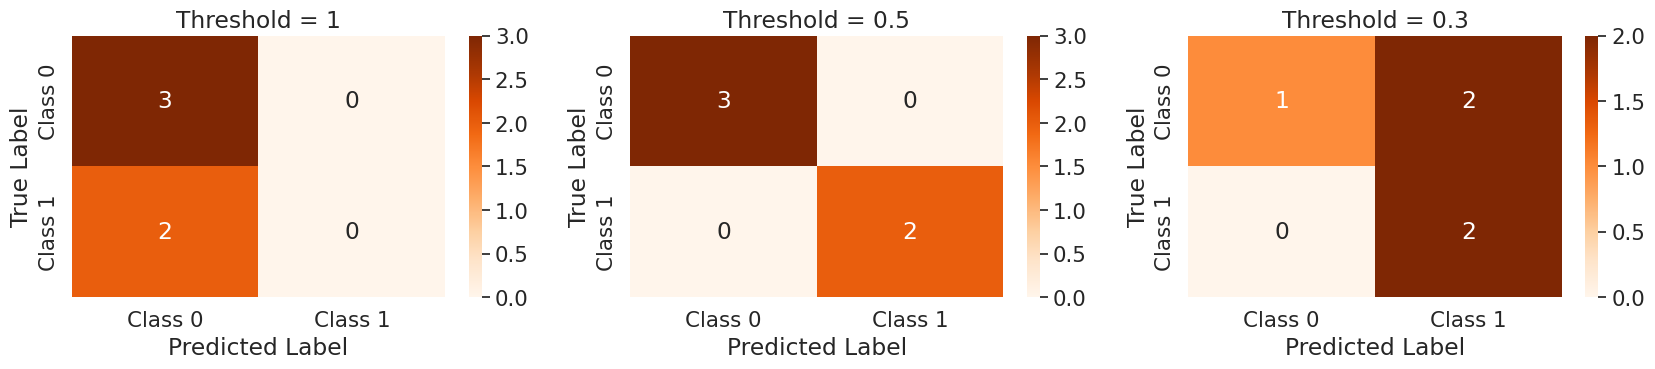

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, threshold, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", ax=ax,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'Threshold = {threshold}')

# Example data
fraud_probabilities = [0.1, 0.6, 0.4, 0.8, 0.3]  # example probabilities
true_labels = [0, 1, 0, 1, 0]  # example true labels
thresholds = [1, 0.5, 0.3]

fig, ax = plt.subplots(1, 3, figsize=(17, 4))
for i, threshold in enumerate(thresholds):
    predicted_classes = [1 if prob >= threshold else 0 for prob in fraud_probabilities]
    plot_confusion_matrix(true_labels, predicted_classes, threshold, ax[i])

plt.tight_layout()
plt.show()
